In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [7]:
data=pd.read_csv("tesla_stock_data_2000_2025.csv")
data.head(5)

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [8]:
data.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [10]:
data = data.iloc[2:].reset_index(drop=True)

In [11]:
data.head(5)

,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
1,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
2,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
3,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
4,2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3692 entries, 0 to 3691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3692 non-null   object
 1   Close   3692 non-null   object
 2   High    3692 non-null   object
 3   Low     3692 non-null   object
 4   Open    3692 non-null   object
 5   Volume  3692 non-null   object
dtypes: object(6)
memory usage: 173.2+ KB


In [13]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
data["Close"]=le.fit_transform(data["Close"])
data["High"]=le.fit_transform(data["High"])
data["Low"]=le.fit_transform(data["Low"])
data["Open"]=le.fit_transform(data["Open"])
data["Volume"]=le.fit_transform(data["Volume"])

<Axes: xlabel='Date', ylabel='Close'>

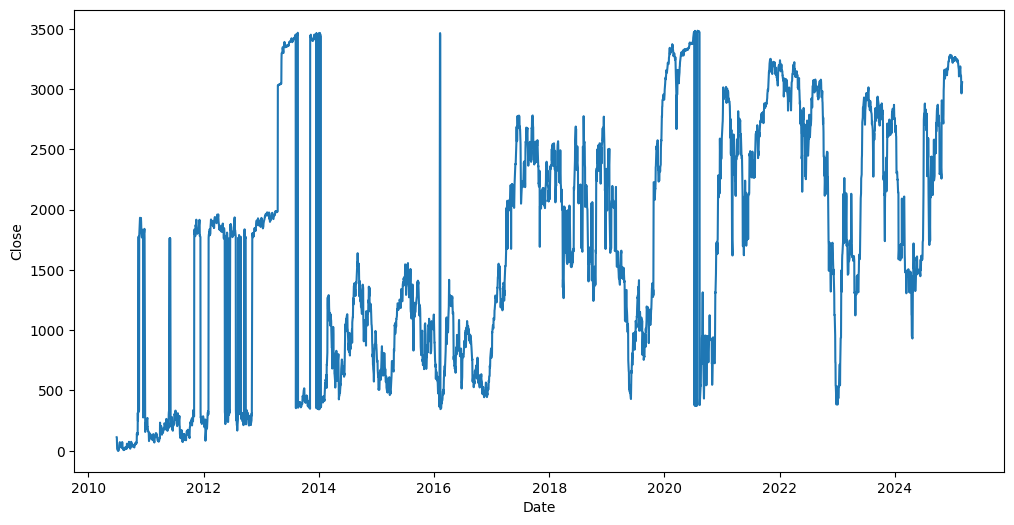

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Date",y="Close",data=data)

In [18]:
df=data[["Close"]].values

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [20]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range(sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [21]:
sequence_length=10

In [22]:
X,y=create_sequence(scaler_data,sequence_length)

In [23]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(3682, 10, 1) (3682,)


In [24]:
model = Sequential()
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1304
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 13/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 14/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102
Epoch 15/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0

In [26]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0072    
Model loss: 0.005396256223320961


In [27]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:20])

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 33.60675 ]
 [ 56.00211 ]
 [ 69.94951 ]
 [ 91.39589 ]
 [120.22711 ]
 [102.53863 ]
 [ 92.264694]
 [106.14895 ]
 [114.95678 ]
 [108.50763 ]
 [ 94.483894]
 [ 93.9328  ]
 [ 84.117   ]
 [ 72.87559 ]
 [ 88.28265 ]
 [108.863144]
 [109.97519 ]
 [ 93.19311 ]
 [ 72.46108 ]
 [ 65.140434]]


In [28]:

actual_values=scaler.inverse_transform(y.reshape(-1,1))

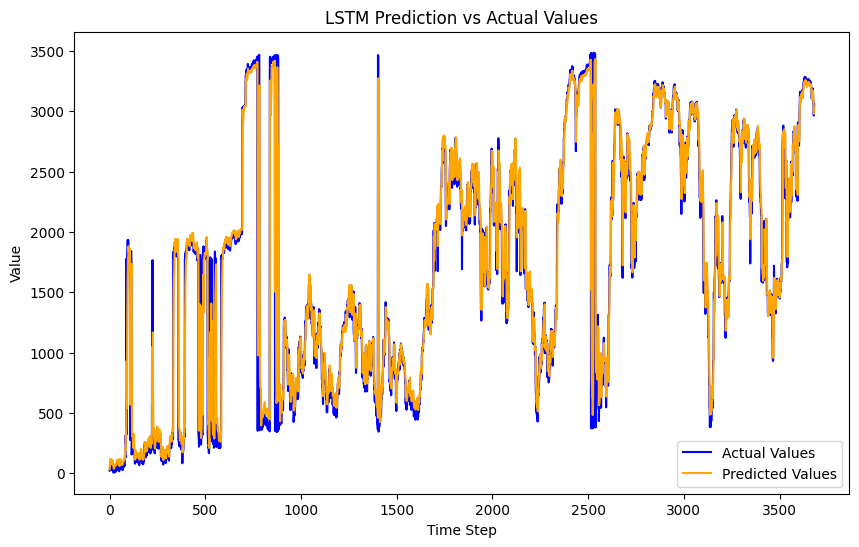

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()